# Assignment 06

In [ ]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor

# calculate r2_score
#compared

In [43]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


# Scaling with Normalization and Fit and Transform

In [10]:
from sklearn.preprocessing import MinMaxScaler
norm_scaler = MinMaxScaler()

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
bmi = norm_scaler.fit(df[['bmi']])

In [13]:
bmi

MinMaxScaler()

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


In [15]:
df['bmi'] = norm_scaler.transform(df[['bmi']])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,0.321227,0,1,3,16884.92400
1,0,1,0.479150,1,0,2,1725.55230
2,10,1,0.458434,3,0,2,4449.46200
3,15,1,0.181464,0,0,1,21984.47061
4,14,1,0.347592,0,0,1,3866.85520


# seperate x,y

In [17]:
x = df.drop('charges', axis = 'columns')

In [18]:
x

,age,sex,bmi,children,smoker,region
0,1,0,0.321227,0,1,3
1,0,1,0.479150,1,0,2
2,10,1,0.458434,3,0,2
3,15,1,0.181464,0,0,1
4,14,1,0.347592,0,0,1
...,...,...,...,...,...,...
1333,32,1,0.403820,3,0,1
1334,0,0,0.429379,0,0,0
1335,0,0,0.562012,0,0,2
1336,3,0,0.264730,0,0,3


In [19]:
y = df['charges']

In [20]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [21]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=.30,random_state = 23)

In [22]:
x_train.head()

,age,sex,bmi,children,smoker,region
923,16,1,0.534167,0,0,1
1121,28,1,0.597525,2,0,2
713,2,1,0.659403,0,0,0
552,44,1,0.146355,0,0,3
738,5,1,0.424267,3,1,0


In [23]:
y_train.head()

923      4320.41085
1121     8347.16430
713      1984.45330
552     12957.11800
738     36189.10170
Name: charges, dtype: float64

In [24]:
x_train.shape

(936, 6)

# Multiple Linear Regression

In [25]:
mult_reg = LinearRegression() #create object

In [26]:
mult_reg.fit(x_train, y_train) #traning all calculation

LinearRegression()

In [27]:
m = mult_reg.coef_
m

array([  245.94487173,  -173.89871781, 12962.63854787,   546.84795959,
       24234.33665543,  -524.00517078])

In [28]:
c = mult_reg.intercept_
c

-1783.0003086670604

In [29]:
pred = mult_reg.predict(x_test)
pred

array([ 1.14891823e+04,  6.40909856e+03,  3.16603449e+04,  1.00628632e+04,
        8.10876223e+03,  9.37157925e+03,  3.58055813e+04,  8.45771081e+03,
        1.29944467e+04,  3.96966715e+04,  1.57050470e+03,  3.70507718e+04,
        4.23657419e+03,  1.23385786e+04,  8.12482192e+03,  5.08395167e+03,
        5.35402656e+03,  3.53259179e+03,  3.54168239e+04,  3.32162171e+04,
        3.89611414e+04,  1.35122961e+04,  8.16992141e+03,  9.70512987e+03,
        3.59253106e+04,  7.03079293e+03,  5.24782428e+03,  2.93211582e+04,
        5.51087549e+02,  1.13129683e+04,  1.36495384e+04,  4.93242756e+03,
        3.86648203e+03,  1.19644550e+04,  8.95700850e+03,  2.92567495e+04,
        1.12024047e+04,  1.06305280e+04,  9.76292042e+03,  4.46165136e+03,
        1.08676803e+04,  3.42958650e+04,  1.12233816e+04,  3.19061467e+04,
        1.13116850e+04,  1.35173352e+04,  4.40133325e+03,  5.43935233e+03,
        8.70107859e+03,  5.32477050e+03,  1.34567243e+04,  8.96597805e+03,
        1.03461062e+04,  

In [30]:
df ['predicted result'] = mult_reg.predict(x) #column create

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges,predicted result
0,1,0,0.321227,0,1,3,16884.92400,25289.212552
1,0,1,0.479150,1,0,2,1725.55230,3752.984934
2,10,1,0.458434,3,0,2,4449.46200,7037.600335
3,15,1,0.181464,0,0,1,21984.47061,3560.515233
4,14,1,0.347592,0,0,1,3866.85520,5468.035334


In [32]:
from sklearn.metrics import r2_score
li_accuracy=r2_score(y_test,pred)

In [33]:
mult_reg.score(x_test,y_test)

0.7289379757416038

# Applying KNN Regressor:


In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)

KNeighborsRegressor()

In [36]:
knn_pred = neigh.predict(x_test)
knn_pred

array([15416.880652,  4602.91354 , 23170.787212,  9586.7114  ,
        3127.41257 ,  7045.34044 , 19914.87522 ,  7055.6454  ,
       13632.88621 , 30805.101388,  2136.5668  , 25426.14653 ,
        2633.80757 , 17141.57761 ,  6089.5634  ,  6771.916254,
       13543.99974 ,  2112.43699 , 20108.82362 , 16783.8056  ,
       36875.19226 ,  9862.613174,  6284.92212 , 11820.74246 ,
       18175.14112 ,  7771.82542 ,  7991.4197  , 27628.895856,
        1677.69324 ,  8454.26702 , 14474.6623  ,  6799.176208,
        9865.828034, 15626.830752, 12434.2586  , 13488.92336 ,
       12476.65159 ,  6872.58064 , 15925.229448,  9489.52239 ,
       13657.56672 , 12958.83198 , 10309.88128 , 21621.55807 ,
       19025.18152 ,  9388.88108 , 13228.993546, 11276.658552,
        8642.3826  ,  9864.273742, 16248.429294,  6590.37354 ,
        9802.4752  , 13139.83154 ,  2985.32188 , 12988.12931 ,
       10688.02774 ,  8366.92776 , 14280.353884,  8484.2416  ,
        9324.349854, 10413.7013  ,  1143.70802 ,  9599.

In [37]:
knn_accuracy = r2_score(y_test, knn_pred)
knn_accuracy

0.35955946742253453

In [38]:
mse = mean_squared_error(y_test, knn_pred)
mse

83544299.32781714

In [39]:
mae = mean_absolute_error(y_test, knn_pred)
mae

5612.299497189055

In [40]:
df ['predicted result'] = neigh.predict(x) #column create

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges,predicted result
0,1,0,0.321227,0,1,3,16884.92400,10141.91640
1,0,1,0.479150,1,0,2,1725.55230,1720.78182
2,10,1,0.458434,3,0,2,4449.46200,10072.11659
3,15,1,0.181464,0,0,1,21984.47061,6873.51213
4,14,1,0.347592,0,0,1,3866.85520,4222.78960


# Bar Graph Compare

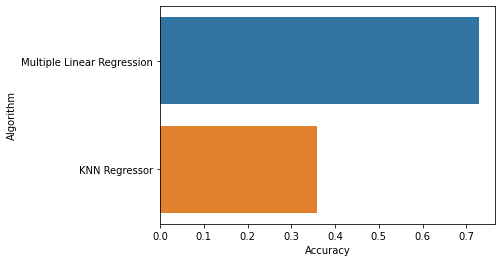

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ["Multiple Linear Regression","KNN Regressor"]
accu = [li_accuracy,knn_accuracy]
sns.barplot(x=accu, y=labels)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()